# ANALYSING AREAS OF INTEREST IN AN ART GALLERY

The following project analyses the areas of interest in an Art Gallery in Denmark. 5 people browse the artwork while wearing Pupil Invisible glasses. I have followed along a Project by PupilLabs (https://pupil-labs.com/blog/news/demo-workspace-walkthrough-part1/).

In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams.update({"font.size": 18})

path_to_reference_image_mapper = (
    "C:\\Users\\rashi\\Desktop\\Pupillometry\\Viewing_Paintings_REFERENCE-IMAGE-MAPPER_Elin_Engelsen_3_standing_csv"
)

In [3]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


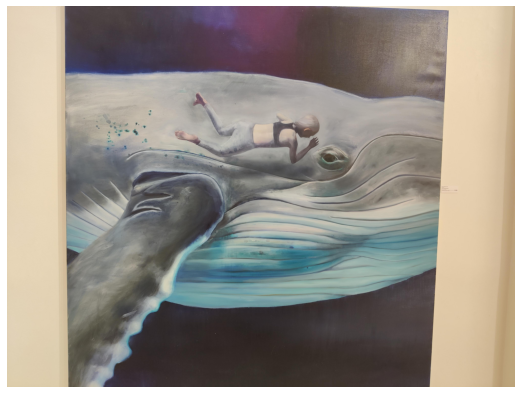

In [30]:
image_fig = plt.figure(figsize=(10, 7))

reference_image = cv2.imread("C:\\Users\\rashi\\Desktop\\Pupillometry\\Viewing_Paintings_REFERENCE-IMAGE-MAPPER_Elin_Engelsen_3_standing_csv\\reference_image.jpeg")

# convert color format to RGB
reference_image = cv2.cvtColor(reference_image, cv2.COLOR_BGR2RGB)

plt.imshow(reference_image)

# remove numbers on axis
plt.gca().set_axis_off()

In [31]:
fixations = pd.read_csv("C:\\Users\\rashi\\Desktop\\Pupillometry\\Viewing_Paintings_REFERENCE-IMAGE-MAPPER_Elin_Engelsen_3_standing_csv\\fixations.csv")

In [32]:
fixations = fixations[fixations["fixation detected in reference image"]]

In [33]:
fixations.head()

,section id,recording id,fixation id,start timestamp [ns],end timestamp [ns],duration [ms],fixation detected in reference image,fixation x [px],fixation y [px]
0,21227327-b8d8-4f1a-ac68-5fc6eefe8bf4,54a0deee-23dd-48f4-806e-6fdb519d6a7c,107,1636035502384515914,1636035502552495914,167,True,2721.0,1143.0
1,21227327-b8d8-4f1a-ac68-5fc6eefe8bf4,54a0deee-23dd-48f4-806e-6fdb519d6a7c,108,1636035502584504914,1636035503048533914,464,True,2978.0,1353.0
2,21227327-b8d8-4f1a-ac68-5fc6eefe8bf4,54a0deee-23dd-48f4-806e-6fdb519d6a7c,109,1636035503076829914,1636035503348491914,271,True,2455.0,1277.0
3,21227327-b8d8-4f1a-ac68-5fc6eefe8bf4,54a0deee-23dd-48f4-806e-6fdb519d6a7c,110,1636035503388487914,1636035503548479914,159,True,2624.0,1050.0
4,21227327-b8d8-4f1a-ac68-5fc6eefe8bf4,54a0deee-23dd-48f4-806e-6fdb519d6a7c,111,1636035503604525914,1636035504152479914,547,True,1182.0,1347.0


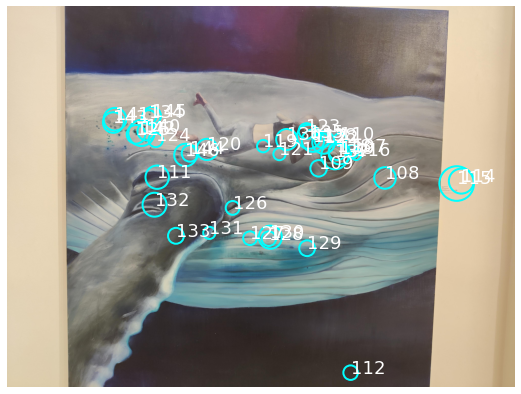

In [34]:
# select fixation data from a single observer
example_section = np.unique(fixations["section id"])[0]
example_fixations = fixations[fixations["section id"] == example_section]

fixation_fig = plt.figure(figsize=(10, 7))

# show the reference image as above
plt.imshow(np.asarray(reference_image))

# plot fixations at their x- and y-position
plt.scatter(
    example_fixations["fixation x [px]"],
    example_fixations["fixation y [px]"],
    # change the facecolor and edgecolor to get circles rather than dots
    facecolor="none",
    edgecolor="cyan",
    linewidth=2,
    # set the size of the circles relative to the duration of each fixation
    s=example_fixations["duration [ms]"],
)

# enumerate the fixations
for fix_id, x, y in zip(
    example_fixations["fixation id"],
    example_fixations["fixation x [px]"],
    example_fixations["fixation y [px]"],
):
    plt.annotate(fix_id, [x, y], color="white")

plt.gca().set_axis_off()
